In [1]:
#import packages
import pandas as pd
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_venn
from matplotlib_venn import venn2
from matplotlib import rc

In [3]:
#read csv file
datafile = "north_america_bear_killings.csv"
#import csv file into df 
purchdata= pd.read_csv(datafile)
bear_killings = purchdata.drop(["Date", "Month", "Year", "Location", "Description", "Type of bear", "Grizzly", "Only one killed"], axis=1)
bear_killing_df = bear_killings.drop(["Type", "Name"], axis=1)
bear_killing_df["age_bins"] = pd.cut(x=bear_killing_df["age"], bins = [0, 19, 39, 59, 79, 99])
bear_killing_df["age_range"] = pd.cut(x=bear_killing_df["age"], bins = [0, 19, 39, 59, 79, 99], labels = ["Child", "Young Adult", "Adult", "Senior", "Elderly"])
bear_killing_df.head()

,age,gender,Hunter,Hikers,age_bins,age_range
0,3.0,female,0,0,"(0, 19]",Child
1,5.0,male,0,0,"(0, 19]",Child
2,7.0,male,0,0,"(0, 19]",Child
3,18.0,male,0,0,"(0, 19]",Child
4,1.0,female,0,0,"(0, 19]",Child


In [4]:
gender = bear_killing_df.groupby("gender")
female = gender.get_group("female").count()
female_count = female["gender"]
male = gender.get_group("male").count()
male_count = male["gender"]
hunters = bear_killing_df.groupby("Hunter")
hunter = hunters.get_group(int(1)).count()
dead_hunters = hunter["Hunter"]
hikers = bear_killing_df.groupby("Hikers")
hiker = hikers.get_group(int(1)).count()
dead_hikers = hiker["Hikers"]
female_df = gender.get_group("female")
female_hunters = female_df.groupby("Hunter")
female_hunter = female_hunters.get_group(int(1)).count()
dead_female_hunters = female_hunter["Hunter"]
male_df = gender.get_group("male")
male_hunters = male_df.groupby("Hunter")
male_hunter = male_hunters.get_group(int(1)).count()
dead_male_hunters = male_hunter["Hunter"]
male_hikers = male_df.groupby("Hikers")
male_hiker = male_hikers.get_group(int(1)).count()
dead_male_hikers = male_hiker["Hikers"]
female_hikers = female_df.groupby("Hikers")
female_hiker = female_hikers.get_group(int(1)).count()
dead_female_hikers = female_hiker["Hikers"]
age_range = bear_killing_df.groupby("age_range")
children = age_range.get_group("Child").count()
children_count = children["age_range"]
young_adult = age_range.get_group("Young Adult").count()
young_adult_count = young_adult["age_range"]
adult = age_range.get_group("Adult").count()
adult_count = adult["age_range"]
senior = age_range.get_group("Senior").count()
senior_count = senior["age_range"]
elderly = age_range.get_group("Elderly").count()
elderly_count = elderly["age_range"]
children_df = age_range.get_group("Child")
child_gender = children_df.groupby("gender")
young_adult_df = age_range.get_group("Young Adult")
young_adult_gender = young_adult_df.groupby("gender")
adult_df = age_range.get_group("Adult")
adult_gender = adult_df.groupby("gender")
senior_df = age_range.get_group("Senior")
senior_gender = senior_df.groupby("gender")
elderly_df = age_range.get_group("Elderly")
elderly_gender = elderly_df.groupby("gender")
child_female = child_gender.get_group("female").count()
child_female_count = child_female["gender"]
child_male = child_gender.get_group("male").count()
child_male_count = child_male["gender"]
young_adult_male = young_adult_gender.get_group("male").count()
young_adult_male_count = young_adult_male["gender"]
young_adult_female = young_adult_gender.get_group("female").count()
young_adult_female_count = young_adult_female["gender"]
adult_male = adult_gender.get_group("male").count()
adult_male_count = adult_male["gender"]
adult_female = adult_gender.get_group("female").count()
adult_female_count = adult_female["gender"]
senior_male = senior_gender.get_group("male").count()
senior_male_count = senior_male["gender"]
senior_female = senior_gender.get_group("female").count()
senior_female_count = senior_female["gender"]
elderly_female = elderly_gender.get_group("female").count()
elderly_female_count = elderly_female["gender"]

In [5]:
female_count

44

In [6]:
male_count

122

In [7]:
dead_hikers

6

In [8]:
dead_hunters

16

In [9]:
dead_female_hunters

1

In [10]:
dead_female_hikers

1

In [11]:
dead_male_hunters

15

In [12]:
dead_male_hikers

5

In [13]:
children_count

41

In [14]:
young_adult_count

54

In [15]:
adult_count

47

In [16]:
senior_count

23

In [17]:
elderly_count

1

In [18]:
child_male_count

25

In [19]:
child_female_count

16

In [20]:
young_adult_female_count

17

In [21]:
young_adult_male_count

37

In [22]:
adult_female_count

4

In [23]:
adult_male_count

43

In [24]:
senior_female_count

6

In [25]:
senior_male_count

17

In [26]:
elderly_female_count

1

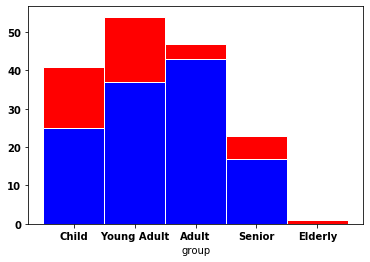

In [29]:
rc('font', weight='bold')

bars1 = [25, 37, 43, 17, 0]
bars2 = [16, 17, 4, 6, 1]
 
bars = np.add(bars1, bars2).tolist()
 
r = [0,1,2,3,4]
 
names = ['Child','Young Adult','Adult','Senior','Elderly']
barWidth = 1
 
plt.bar(r, bars1, color='blue', edgecolor='white', width=barWidth)

plt.bar(r, bars2, bottom=bars1, color='red', edgecolor='white', width=barWidth)

plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")

plt.show()

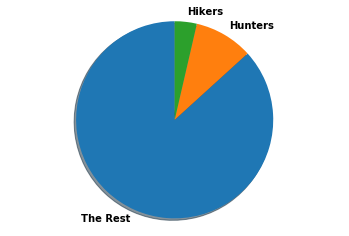

In [45]:
labels = "The Rest", "Hunters", "Hikers"
sizes = [144, 16,6]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

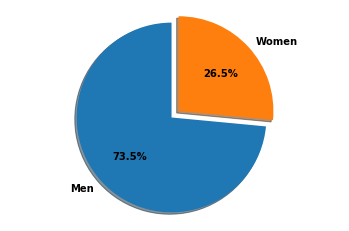

In [36]:
labels = "Men", "Women"
sizes = [73.5, 26.5]
explode = (0.1, 0,)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

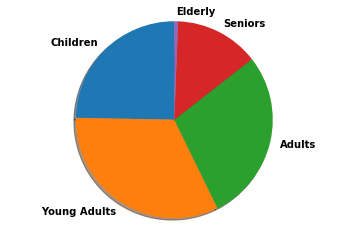

In [44]:
labels = "Children", "Young Adults", "Adults", "Seniors", "Elderly"
sizes = [41, 54, 47, 23, 1]
explode = (0, 0 , 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,autopct = "",
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A9F790BF08>,
      dtype=object)

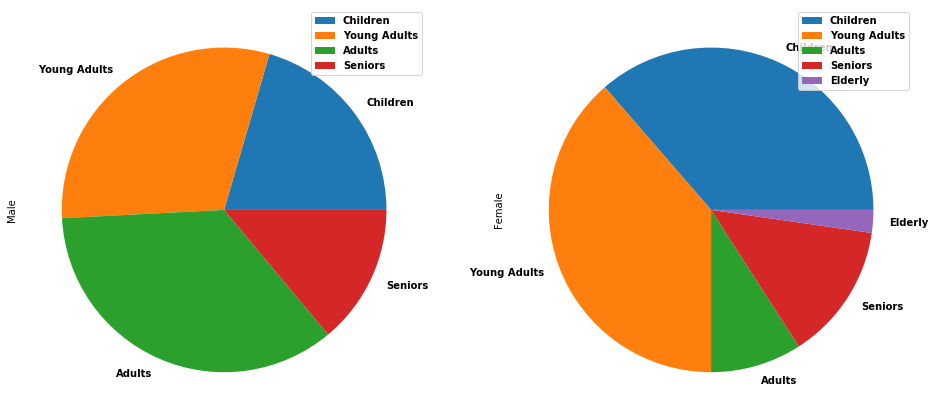

In [50]:
df = pd.DataFrame({'Male':[25, 37, 43, 17, 0], 'Female':[16, 17, 4, 6, 1]}, index=["Children", "Young Adults", "Adults", "Seniors", "Elderly"] )
 
df.plot(kind = "pie", subplots=True, figsize=(16,8))

In [ ]:
#Who dies from bear attacks?

#The short answer is adult men between the ages of 40 and 60. In every age category there were more males that died than females.
#outside of our one elderly lady who apparently had an unfortunate run in with a bear in 2001 in New Mexico at the ripe age of 93.

#Out of 166 recorded deaths, 22 occured while participating in a wildreness relate activity. 16 people died while hunting, while another 6
#died while hiking. There was 1 woman hunting, and 1 woman hiking.

#Aside from scrubbing the data this was pretty straight forward. Deciding the best way to visualize the important information without too many
#colorful and overwhelming graphs was the hard part. 